Code to test image generation

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

assert 'OPENAI_API_KEY' in os.environ, "You will need to set an OPENAI_API_KEY"
assert 'LANGCHAIN_API_KEY' in os.environ, "You will need to set an LANGCHAIN_API_KEY"

In [ ]:
from openai import OpenAI
import urllib.request 
from PIL import Image 
client = OpenAI()

def GenerateImage(prompt:str):
  response = client.images.generate(
    model="dall-e-2",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
  )
  image_url = response.data[0].url
  urllib.request.urlretrieve(image_url,"gfg.png") 
  img = Image.open("gfg.png") 
  display(img)

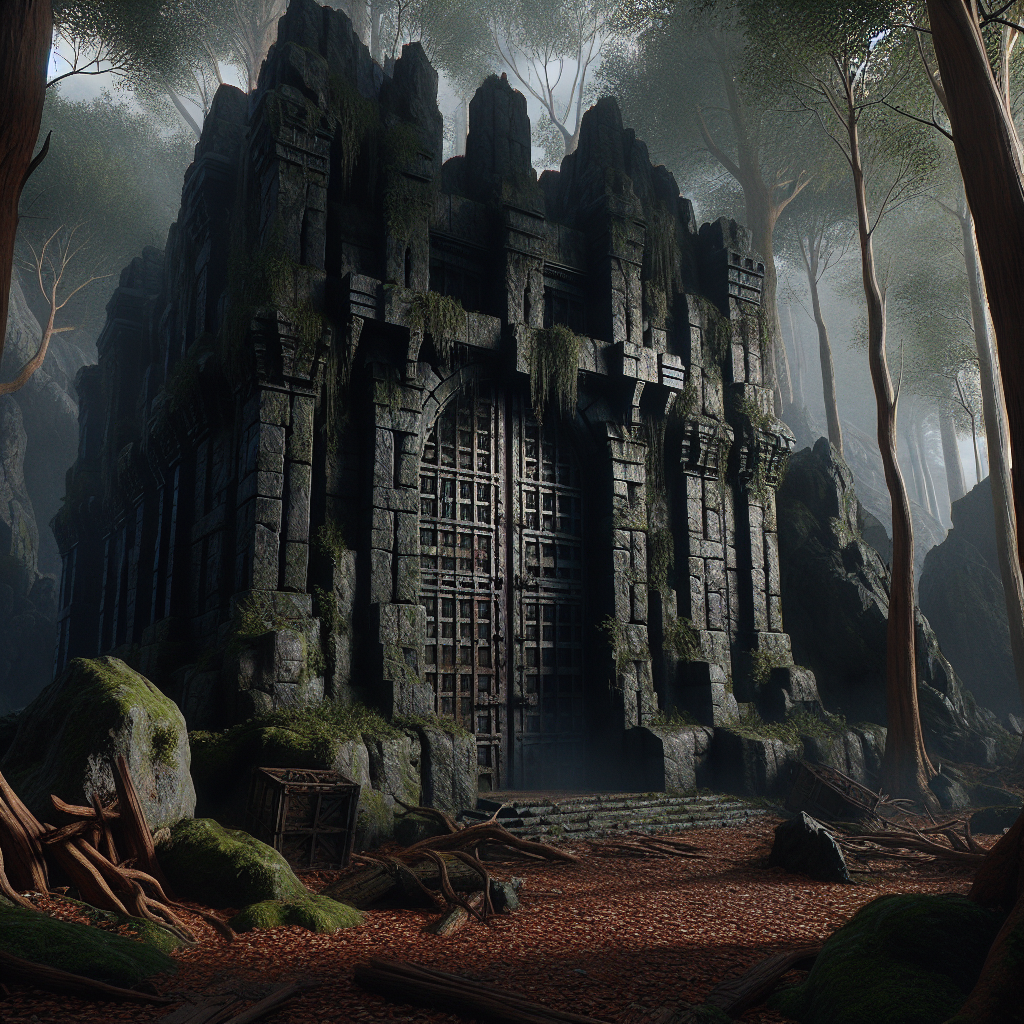

In [3]:
GenerateImage("A dungeon deep in the woods, built out of volcano stone")

In [ ]:
from langchain.agents import initialize_agent, load_tools
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI

llm = OpenAI(temperature=0.9)
prompt = PromptTemplate(
    input_variables=["image_desc"],
    template="Generate a detailed prompt to generate an image based on the following description: {image_desc}",
)

tools = load_tools(["dalle-image-generator"])
# Create an agent executor
# Create an OpenAI Functions agent
agent = create_openai_functions_agent(llm, tools, prompt=prompt)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent,tools=tools,verbose=True, max_iteration=50, max_execution_time=50, return_intermediate_steps=True)



> Entering new AgentExecutor chain...
 I should think about what to do
Action: Dall-E-Image-Generator
Action Input: "A spooky Halloween night at a haunted museum."

AuthenticationError: Error code: 401 - {'error': {'code': 'invalid_api_key', 'message': 'Incorrect API key provided: **********. You can find your API key at https://platform.openai.com/account/api-keys.', 'param': None, 'type': 'invalid_request_error'}}